# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
import numpy as np
%matplotlib inline

In [4]:
# Ваш код здесь
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
adver_data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


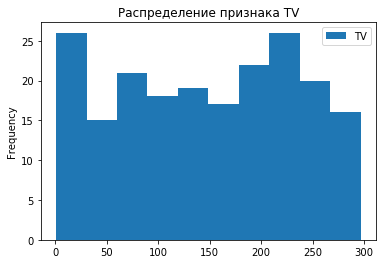

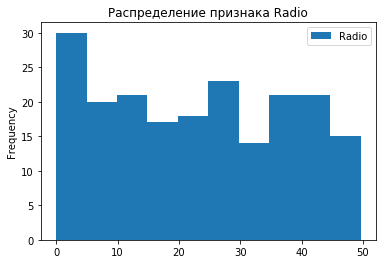

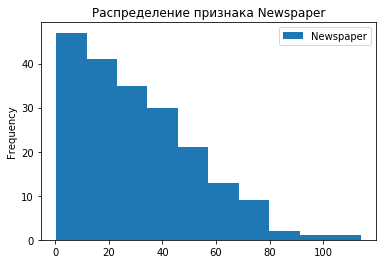

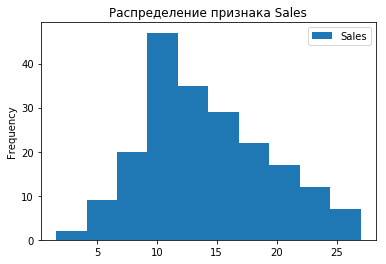

In [7]:
# Ваш код здесь
for mark in ('TV', 'Radio', 'Newspaper', 'Sales'):
    adver_data.plot(y=mark, kind='hist', title=u'Распределение признака '+mark)

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [8]:
type(adver_data['TV'].values)

numpy.ndarray

In [9]:
X = np.array([adver_data[sign].values for sign in ('TV', 'Radio', 'Newspaper') ]).T # Ваш код здесь
y = np.array([adver_data['Sales'].values]).T # Ваш код здесь
print X.ndim, X.size
print X, y

2 600
[[ 230.1   37.8   69.2]
 [  44.5   39.3   45.1]
 [  17.2   45.9   69.3]
 [ 151.5   41.3   58.5]
 [ 180.8   10.8   58.4]
 [   8.7   48.9   75. ]
 [  57.5   32.8   23.5]
 [ 120.2   19.6   11.6]
 [   8.6    2.1    1. ]
 [ 199.8    2.6   21.2]
 [  66.1    5.8   24.2]
 [ 214.7   24.     4. ]
 [  23.8   35.1   65.9]
 [  97.5    7.6    7.2]
 [ 204.1   32.9   46. ]
 [ 195.4   47.7   52.9]
 [  67.8   36.6  114. ]
 [ 281.4   39.6   55.8]
 [  69.2   20.5   18.3]
 [ 147.3   23.9   19.1]
 [ 218.4   27.7   53.4]
 [ 237.4    5.1   23.5]
 [  13.2   15.9   49.6]
 [ 228.3   16.9   26.2]
 [  62.3   12.6   18.3]
 [ 262.9    3.5   19.5]
 [ 142.9   29.3   12.6]
 [ 240.1   16.7   22.9]
 [ 248.8   27.1   22.9]
 [  70.6   16.    40.8]
 [ 292.9   28.3   43.2]
 [ 112.9   17.4   38.6]
 [  97.2    1.5   30. ]
 [ 265.6   20.     0.3]
 [  95.7    1.4    7.4]
 [ 290.7    4.1    8.5]
 [ 266.9   43.8    5. ]
 [  74.7   49.4   45.7]
 [  43.1   26.7   35.1]
 [ 228.    37.7   32. ]
 [ 202.5   22.3   31.6]
 [ 177.   

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [10]:
# пробуем
print X.mean(axis=0), X.std(axis=0)

[ 147.0425   23.264    30.554 ] [ 85.63933176  14.80964564  21.72410606]


In [11]:
means, stds = X.mean(axis=0), X.std(axis=0) # Ваш код 
print means, stds

[ 147.0425   23.264    30.554 ] [ 85.63933176  14.80964564  21.72410606]


In [12]:
X = (X - means)/stds # Ваш код здесь

In [13]:
# проверяем
#X[:,0].size
print X.shape[0], X.shape
np.ones(X.shape[0])

200 (200L, 3L)


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [14]:
import numpy as np
d = X.shape[0]
ones_for_X = np.ones(d).reshape(d,1)
ones_and_X = np.hstack((ones_for_X, X)) # Ваш код здесь

In [15]:
# проверки
print ones_and_X
print type(ones_and_X)
print ones_and_X.shape

[[  1.00000000e+00   9.69852266e-01   9.81522472e-01   1.77894547e+00]
 [  1.00000000e+00  -1.19737623e+00   1.08280781e+00   6.69578760e-01]
 [  1.00000000e+00  -1.51615499e+00   1.52846331e+00   1.78354865e+00]
 [  1.00000000e+00   5.20496822e-02   1.21785493e+00   1.28640506e+00]
 [  1.00000000e+00   3.94182198e-01  -8.41613655e-01   1.28180188e+00]
 [  1.00000000e+00  -1.61540845e+00   1.73103399e+00   2.04592999e+00]
 [  1.00000000e+00  -1.04557682e+00   6.43904671e-01  -3.24708413e-01]
 [  1.00000000e+00  -3.13436589e-01  -2.47406325e-01  -8.72486994e-01]
 [  1.00000000e+00  -1.61657614e+00  -1.42906863e+00  -1.36042422e+00]
 [  1.00000000e+00   6.16042873e-01  -1.39530685e+00  -4.30581584e-01]
 [  1.00000000e+00  -9.45155670e-01  -1.17923146e+00  -2.92486143e-01]
 [  1.00000000e+00   7.90028350e-01   4.96973404e-02  -1.22232878e+00]
 [  1.00000000e+00  -1.43908760e+00   7.99208859e-01   1.62704048e+00]
 [  1.00000000e+00  -5.78501712e-01  -1.05768905e+00  -1.07502697e+00]
 [  1.

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [16]:
def mserror(y, y_pred):
    return np.mean((y-y_pred)**2)
    # Ваш код здесь

In [3]:
"""
# проверяем функцию
mserror(ones_for_X*3, ones_for_X)
"""

'\n# \xd0\xbf\xd1\x80\xd0\xbe\xd0\xb2\xd0\xb5\xd1\x80\xd1\x8f\xd0\xb5\xd0\xbc \xd1\x84\xd1\x83\xd0\xbd\xd0\xba\xd1\x86\xd0\xb8\xd1\x8e\nmserror(ones_for_X*3, ones_for_X)\n'

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [18]:
answer1 = mserror(y, np.median(y)) # Ваш код здесь
print(answer1)
write_answer_to_file(answer1, '1.txt')

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [19]:
"""
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)  # Ваш код здесь
"""

In [22]:
# другой вариант (более стабильный!)
def normal_equation(X, y):
    from numpy import linalg
    return np.linalg.solve(X.T.dot(X), X.T.dot(y))

In [23]:
norm_eq_weights = normal_equation(ones_and_X, y)
norm_eq_weights

array([[ 14.0225    ],
       [  3.91925365],
       [  2.79206274],
       [ -0.02253861]])

**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [24]:
answer2 = norm_eq_weights[0]# Ваш код здесь
print(answer2)
write_answer_to_file(answer2, '2.txt')

[ 14.0225]


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [25]:
def linear_prediction(X, w):
    return np.dot(X, w)
    # Ваш код здесь

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [26]:
# проверки по размерностям
y_pred_S = linear_prediction(ones_and_X, norm_eq_weights)
print y_pred_S, y[:,0], (y[:,0]-y_pred_S).shape, y, y.reshape(1, len(y))

[[ 20.52397441]
 [ 12.33785482]
 [ 12.30767078]
 [ 17.59782951]
 [ 13.18867186]
 [ 12.47834763]
 [ 11.72975995]
 [ 12.12295317]
 [  3.72734086]
 [ 12.55084872]
 [  7.0322992 ]
 [ 17.28512918]
 [ 10.57712073]
 [  8.82630048]
 [ 18.43436638]
 [ 20.81929952]
 [ 12.82365674]
 [ 23.22495716]
 [  9.95168206]
 [ 14.16607293]
 [ 18.10076728]
 [ 14.7405382 ]
 [  6.4891503 ]
 [ 16.5459329 ]
 [  8.14651887]
 [ 15.6100386 ]
 [ 14.98951429]
 [ 17.05167344]
 [ 19.41053803]
 [  9.14402389]
 [ 21.6339338 ]
 [ 11.3460929 ]
 [  7.63888314]
 [ 18.86426829]
 [  7.57483051]
 [ 17.00682618]
 [ 23.40590052]
 [ 15.62347779]
 [  9.90868103]
 [ 20.44761039]
 [ 16.37766467]
 [ 17.2959832 ]
 [ 21.59580326]
 [ 13.96385684]
 [  8.88787996]
 [ 15.16152314]
 [  8.87338673]
 [ 21.7226299 ]
 [ 16.26362018]
 [  8.1681656 ]
 [ 12.63121132]
 [  9.33981296]
 [ 20.66297563]
 [ 19.94469957]
 [ 20.37443008]
 [ 21.2926106 ]
 [  8.52771254]
 [ 12.77458802]
 [ 21.89805198]
 [ 18.13348698]
 [  5.74215558]
 [ 22.89067208]
 [ 16.78

In [27]:
answer3 =  mserror(y, y_pred_S) # Ваш код здесь
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.78412631451


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [1]:
"""
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    df = 2./len(y) * (np.array(X[train_ind].dot(w)) - np.array(y[train_ind, 0]))
    #print df
    grad0 = df # Ваш код здесь
    grad1 = X[train_ind, 1] * df # Ваш код здесь
    #print X[train_ind, 1], np.array(X[train_ind]).dot(w), y[train_ind, 0], grad1
    grad2 = X[train_ind, 2] * df # Ваш код здесь
    grad3 = X[train_ind, 3] * df # Ваш код здесь
    #print w - eta * np.array([grad0, grad1, grad2, grad3])
    return  w - eta * np.array([grad0, grad1, grad2, grad3])
"""    

'\ndef stochastic_gradient_step(X, y, w, train_ind, eta=0.01):\n    df = 2./len(y) * (np.array(X[train_ind].dot(w)) - np.array(y[train_ind, 0]))\n    #print df\n    grad0 = df # \xd0\x92\xd0\xb0\xd1\x88 \xd0\xba\xd0\xbe\xd0\xb4 \xd0\xb7\xd0\xb4\xd0\xb5\xd1\x81\xd1\x8c\n    grad1 = X[train_ind, 1] * df # \xd0\x92\xd0\xb0\xd1\x88 \xd0\xba\xd0\xbe\xd0\xb4 \xd0\xb7\xd0\xb4\xd0\xb5\xd1\x81\xd1\x8c\n    #print X[train_ind, 1], np.array(X[train_ind]).dot(w), y[train_ind, 0], grad1\n    grad2 = X[train_ind, 2] * df # \xd0\x92\xd0\xb0\xd1\x88 \xd0\xba\xd0\xbe\xd0\xb4 \xd0\xb7\xd0\xb4\xd0\xb5\xd1\x81\xd1\x8c\n    grad3 = X[train_ind, 3] * df # \xd0\x92\xd0\xb0\xd1\x88 \xd0\xba\xd0\xbe\xd0\xb4 \xd0\xb7\xd0\xb4\xd0\xb5\xd1\x81\xd1\x8c\n    #print w - eta * np.array([grad0, grad1, grad2, grad3])\n    return  w - eta * np.array([grad0, grad1, grad2, grad3])\n'

In [29]:
# модификация функции через матрицы
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    df = 2./len(y) * (np.array(X[train_ind].dot(w)) - np.array(y[train_ind, 0]))
    grad = X[train_ind] * df
    return  w - eta * grad

In [30]:
print len(y)

200


In [31]:
# проверка
w = np.array([0,0,0,0])
w = stochastic_gradient_step(ones_and_X, y, w, train_ind=1, eta=0.01)
print y[0, 0], ones_and_X[0], w, np.array(ones_and_X[0].dot(w))

22.1 [ 1.          0.96985227  0.98152247  1.77894547] [ 0.00104    -0.00124527  0.00112612  0.00069636] 0.00217637290322


**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [32]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed) 
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        # Ваш код здесь
        w_next = stochastic_gradient_step(X, y, w, random_ind, eta)
        #print w_next
        weight_dist = np.linalg.norm(w_next - w)
        y_pred = linear_prediction(X, w_next)
        #errors.extend([weight_dist])
        errors.extend([mserror(y[:,0], y_pred)])
        w = w_next
        #print w
        iter_num += 1               
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [33]:
%%time
w_init = [0, 0, 0, 0]
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(ones_and_X, y, w_init, max_iter=1e5) # Ваш код здесь

Wall time: 4.54 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sign']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


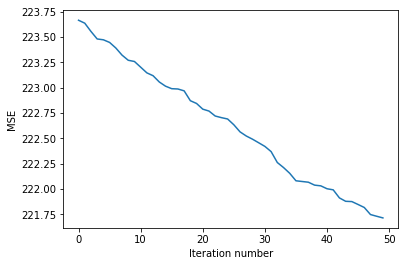

In [34]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


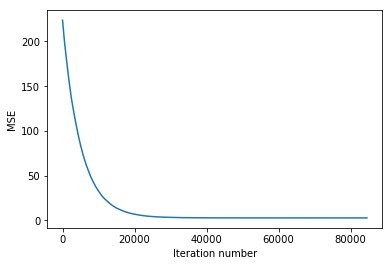

In [35]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [36]:
stoch_grad_desc_weights

array([  1.40190566e+01,   3.91069256e+00,   2.78209808e+00,
        -8.10462217e-03])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [37]:
stoch_errors_by_iter[-1]

2.7844125884067035

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [38]:
answer4 = mserror(y[:,0], linear_prediction(ones_and_X, stoch_grad_desc_weights)) # Ваш код здесь
print(answer4)
write_answer_to_file(answer4, '4.txt')
#print linear_prediction(ones_and_X, stoch_grad_desc_weights)

2.78441258841


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**

In [39]:
type(y[:,0])

numpy.ndarray

In [40]:
y[:,0]

array([ 22.1,  10.4,   9.3,  18.5,  12.9,   7.2,  11.8,  13.2,   4.8,
        10.6,   8.6,  17.4,   9.2,   9.7,  19. ,  22.4,  12.5,  24.4,
        11.3,  14.6,  18. ,  12.5,   5.6,  15.5,   9.7,  12. ,  15. ,
        15.9,  18.9,  10.5,  21.4,  11.9,   9.6,  17.4,   9.5,  12.8,
        25.4,  14.7,  10.1,  21.5,  16.6,  17.1,  20.7,  12.9,   8.5,
        14.9,  10.6,  23.2,  14.8,   9.7,  11.4,  10.7,  22.6,  21.2,
        20.2,  23.7,   5.5,  13.2,  23.8,  18.4,   8.1,  24.2,  15.7,
        14. ,  18. ,   9.3,   9.5,  13.4,  18.9,  22.3,  18.3,  12.4,
         8.8,  11. ,  17. ,   8.7,   6.9,  14.2,   5.3,  11. ,  11.8,
        12.3,  11.3,  13.6,  21.7,  15.2,  12. ,  16. ,  12.9,  16.7,
        11.2,   7.3,  19.4,  22.2,  11.5,  16.9,  11.7,  15.5,  25.4,
        17.2,  11.7,  23.8,  14.8,  14.7,  20.7,  19.2,   7.2,   8.7,
         5.3,  19.8,  13.4,  21.8,  14.1,  15.9,  14.6,  12.6,  12.2,
         9.4,  15.9,   6.6,  15.5,   7. ,  11.6,  15.2,  19.7,  10.6,
         6.6,   8.8,

In [41]:
y[:,0].shape

(200L,)

In [42]:
mark

'Sales'